In [103]:
import requests
from bs4 import BeautifulSoup
import re
import ast
import pandas as pd
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sqlalchemy import create_engine
import json
warnings.filterwarnings("ignore")

In [93]:
START_DATE = datetime(2021, 1, 26)
today = datetime.today()
day_list = []

while START_DATE <= today:
    day_list.append(START_DATE)
    START_DATE += timedelta(days=1)

day_list

[datetime.datetime(2021, 1, 26, 0, 0),
 datetime.datetime(2021, 1, 27, 0, 0),
 datetime.datetime(2021, 1, 28, 0, 0),
 datetime.datetime(2021, 1, 29, 0, 0),
 datetime.datetime(2021, 1, 30, 0, 0),
 datetime.datetime(2021, 1, 31, 0, 0),
 datetime.datetime(2021, 2, 1, 0, 0),
 datetime.datetime(2021, 2, 2, 0, 0),
 datetime.datetime(2021, 2, 3, 0, 0),
 datetime.datetime(2021, 2, 4, 0, 0),
 datetime.datetime(2021, 2, 5, 0, 0),
 datetime.datetime(2021, 2, 6, 0, 0),
 datetime.datetime(2021, 2, 7, 0, 0),
 datetime.datetime(2021, 2, 8, 0, 0),
 datetime.datetime(2021, 2, 9, 0, 0),
 datetime.datetime(2021, 2, 10, 0, 0),
 datetime.datetime(2021, 2, 11, 0, 0),
 datetime.datetime(2021, 2, 12, 0, 0),
 datetime.datetime(2021, 2, 13, 0, 0),
 datetime.datetime(2021, 2, 14, 0, 0),
 datetime.datetime(2021, 2, 15, 0, 0),
 datetime.datetime(2021, 2, 16, 0, 0),
 datetime.datetime(2021, 2, 17, 0, 0),
 datetime.datetime(2021, 2, 18, 0, 0),
 datetime.datetime(2021, 2, 19, 0, 0),
 datetime.datetime(2021, 2, 20, 0,

In [97]:
df = pd.DataFrame()
for date in day_list:
    day = date.day
    month = date.month
    year = date.year
    

    url = f"http://www.wiatrkadyny.pl/rewa/wxwugraphs/graphd1a.php?theme=pepper&d={day}&m={month}&y={year}&w=900&h=350"


    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
    else:
        print(f"Failed to fetch data from {url}")

    patternWindSpeed = r'var dAvgWS\s*=\s*(\[.*?\]);'
    patternWindGust = r'var dGustWS\s*=\s*(\[.*?\]);'
    patternTemp = r'var dTemp\s*=\s*(\[.*?\]);'
    patternWindDir = r'var dWindDir\s*=\s*(\[.*?\]);'
    patternBaro = r'var dBaro\s*=\s*(\[.*?\]);'

    # Use re.findall to find all matches in the HTML content
    WindSpeed = re.findall(patternWindSpeed, str(soup.contents), re.IGNORECASE | re.DOTALL)
    WindGust = re.findall(patternWindGust, str(soup.contents), re.IGNORECASE | re.DOTALL)
    Temp = re.findall(patternTemp, str(soup.contents), re.IGNORECASE | re.DOTALL)
    WindDir = re.findall(patternWindDir, str(soup.contents), re.IGNORECASE | re.DOTALL)
    Baro = re.findall(patternBaro, str(soup.contents), re.IGNORECASE | re.DOTALL)

    # Remove the trailing comma to make it a valid JSON-like format
    WindSpeed = ast.literal_eval(WindSpeed[0].rstrip(','))[:-1]
    WindGust = ast.literal_eval(WindGust[0].rstrip(','))[:-1]
    Temp = ast.literal_eval(Temp[0].rstrip(','))[:-1]
    WindDir = ast.literal_eval(WindDir[0].rstrip(','))[:-1]
    Baro = ast.literal_eval(Baro[0].rstrip(','))[:-1]

    # Define the date and time components
    hour = 0  # Starting hour
    minute = 0  # Starting minute
    second = 0  # Starting second

    # Create a list to store datetime values
    datetime_values = []

    # Define the time interval (10 minutes)
    time_interval = timedelta(minutes=10)

    # Create datetime values with 10-minute intervals for the entire day
    while hour < 24:
        current_datetime = datetime(year, month, day, hour, minute, second)
        datetime_values.append(current_datetime)
        minute += 10
        if minute == 60:
            minute = 0
            hour += 1

    print(len(WindSpeed))
    print(len(datetime_values[:(len(WindSpeed))]))

    # Create a DataFrame
    data = {
        'Time': datetime_values[:(len(WindSpeed))],
        'WindSpeed': WindSpeed,
        'WindGust': WindGust,
        'Temp': Temp,
        'WindDir': WindDir,
        'Baro': Baro
    }

    df_i = pd.DataFrame(data)
    df = pd.concat([df,df_i])
    time.sleep(2)


144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
143
143
144
144
143
143
144
144
144
144
144
144
144
144
144
144
144
144
143
143
144
144
144
144
144
144
144
144
140
140
143
143
144
144
144
144
144
144
143
143
144
144
144
144
143
143
144
144
144
144
144
144
138
138
144
144
144
144
121
121
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
142
142
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
127
127
94
94
144
144
144
144
144
144
144
144
144
144
144
144
143
143
144
144
119
119
144
144
139
139
144
144
144
144
144
144
144
144
14

ValueError: All arrays must be of the same length

<Axes: xlabel='Time', ylabel='WindSpeed'>

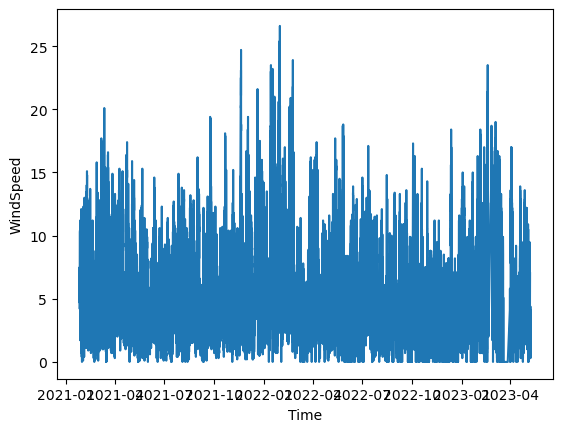

In [98]:
sns.lineplot(data=df, x='Time', y='WindSpeed')

In [99]:
df.to_csv('data.csv')

In [105]:
# Read the MySQL configuration from the JSON file
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

In [108]:
# Extract MySQL connection details
mysql_config = config.get('mysql', {})
username = mysql_config.get('username', 'default_username')
password = mysql_config.get('password', 'default_password')
host = mysql_config.get('host', 'localhost')
database_name = mysql_config.get('database_name', 'your_database')
table_name = 'measurments_rewa'

In [109]:
# Create the MySQL database connection string
db_url = f"mysql+mysqlconnector://{username}:{password}@{host}/{database_name}"

# Create an SQLAlchemy engine
engine = create_engine(db_url)

In [110]:
# Insert the Pandas DataFrame into the MySQL table
df.to_sql(table_name, engine, if_exists='replace', index=False)

114251